In [5]:
import numpy as np # 数据处理最重要的模块
import pandas as pd # 数据处理最重要的模块
import scipy.stats as stats # 统计模块
import scipy
# import pymysql  # 导入数据库模块

from datetime import datetime # 时间模块
import statsmodels.formula.api as smf  # OLS regression

# import pyreadr # read RDS file

from matplotlib import style
import matplotlib.pyplot as plt  # 画图模块
import matplotlib.dates as mdates


from matplotlib.font_manager import FontProperties # 作图中文
from pylab import mpl
#mpl.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['font.family'] = 'Times New Roman'


#输出矢量图 渲染矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.core.interactiveshell import InteractiveShell # jupyter运行输出的模块
#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns', None)

### Stock Market Return (Excess Return)

In [6]:
from pandas.tseries.offsets import MonthEnd # 月末
Market_ret = pd.read_csv('/Users/liuwanting/Desktop/pythonhomework/Marketret_mon_stock2024.csv')
Market_ret['month'] = pd.to_datetime(Market_ret['month'], format='%b %Y') + MonthEnd(0)
Market_ret.set_index('month', inplace=True)
Market_ret.sort_index(inplace=True)
Market_ret = Market_ret.drop(columns=['Unnamed: 0'])
Market_ret

,MarketR,MarketR_e,rfmonth,ret,ret_e,marketret3,marketret6,marketret12,Q
month,,,,,,,,,
1991-01-31,0.029998,0.036554,0.006930,0.023068,0.029624,-0.084127,-0.305662,0.254049,1991 Q1
1991-02-28,0.010203,0.021860,0.006930,0.003273,0.014930,-0.183573,-0.384745,0.241492,1991 Q1
1991-03-31,-0.099663,-0.060425,0.006930,-0.106593,-0.067355,-0.252928,-0.445049,0.288857,1991 Q1
1991-04-30,-0.079652,-0.031449,0.006651,-0.086303,-0.038100,-0.234776,-0.394937,0.691749,1991 Q2
1991-05-31,-0.074521,0.005375,0.006092,-0.080613,-0.000717,-0.236294,0.181673,1.542701,1991 Q2
...,...,...,...,...,...,...,...,...,...
2024-08-31,-0.031468,-0.033685,0.001118,-0.032586,-0.034803,0.151050,NaN,NaN,2024 Q3
2024-09-30,0.195992,0.227078,0.001118,0.194874,0.225960,0.200147,NaN,NaN,2024 Q3
2024-10-31,-0.003409,0.070220,0.001118,-0.004527,0.069102,0.000228,NaN,NaN,2024 Q4


### goldprice


黄金价格（月度数据）的预测分析

在资产定价中，构建一个资产收益率对某一预测因子的简单线性回归，是检验可预测性的最常用方法之一。考虑股票市场的月度收益率($r_
{t + 1}$)，使用黄金价格收益率($Gold_t$) 作为预测变量，可以写成如下的单变量预测回归模型：

$$
r_
{t + 1} = \alpha + \beta
Gold_t + \varepsilon_
{t + 1}
$$

其中($\varepsilon_
{t + 1}$) 为均值为零、不可预测的扰动项。

我们希望检验：
黄金价格（月度变动）是否能够预测未来一个月的股票市场收益率？
也就是 **$\beta$ 是否显著不等于
0（是否存在预测能力） ** 。

### **假设检验：**

零假设($H_0$)：
$$
H_0: \beta = 0
$$

备择假设($H_1$)：
$$
H_1: \beta \neq
0  \quad(\text
{我们需要根据理论判断 $\beta$ 的符号})
$$

本次作业中的模型为：

$$
r_
{t + 1} = \alpha + \beta \cdot
Gold_
{t} + \varepsilon_
{t + 1}
$$

其中($Gold_t$) 表示黄金价格的月度收益率（log
return）。

---

#**模型：黄金价格与股票预期收益率**

黄金价格作为预测因子，它是一种资产，而不是宏观变量。因此我们必须重新解释
β
的含义。

理论上存在两种可能：

---

#**两个理论假设：**

### **H1： $\beta < 0$（负相关）**
黄金上涨 $\rightarrow$ 股票下跌
市场风险偏好下降 $\rightarrow$ 投资者从风险资产撤离至安全资产

### **H2： $\beta > 0$（正相关）**
黄金与股票都反映全球流动性 $\rightarrow$ 可能同涨同跌
资金充裕时 $\rightarrow$ 贵金属、风险资产同时上涨

---

这两种理论都有坚实基础，因此
β
的符号是一个实证问题。

---

#**引言：黄金在资产定价中的地位**

黄金在全球金融体系中长期被视为：

*安全资产（Safe
Haven）
*对冲不确定性（Hedge
against
uncertainty）
*对冲系统性风险
*以美元计价的国际资产

因此黄金价格波动本身受：

*全球风险偏好
*利率变动
*宏观经济不确定性
*地缘政治事件

等因素驱动。
在股票预测模型中使用黄金，是一个经典且高度可发表的研究思路。

---

# 一、 黄金价格与股票收益率的 **负相关**：避险资产逻辑（β < 0）

这是最广泛被讨论的理论，也是许多实证研究的核心。

## **1. 黄金作为“避险资产”（Safe Haven）**

当金融市场动荡时：

投资者卖出股票

买入黄金以保值

➡ 资金从股票市场流出

➡黄金价格上涨 → 股票价格下跌

因此：
$$
\beta < 0
$$

这个逻辑在以下情况下尤其明显：

*市场恐慌（VIX
急升）
*经济衰退预期增强
*利率快速变化
*地缘政治冲突

## **2. 实证支持**

Baur & McDermott(2010)
发现：

*黄金在金融危机期间对股票市场具有“避险”性质
*这种负相关关系在短期尤为显著

这一机制意味着黄金可用于预测未来股票收益：
黄金涨得越多 → 投资者越恐慌 → 股票未来收益越低。

---

# 二、 黄金价格与股票收益率的 **正相关**：流动性溢出逻辑（β > 0）

尽管避险逻辑很强，但也有很多情况两者呈现 ** 正相关 **。

## **理论逻辑：全球流动性推动风险资产和贵金属共同上涨**

当全球流动性宽松时（如
QE）：

*股票上涨（资产价格上升）
*黄金上涨（对冲货币贬值）

此时：
$$
\beta > 0
$$

因为流动性溢出到各类资产，导致它们同步上涨。
例如
2009–2011
年，美国
QE
导致股票和黄金同时大幅上涨。

## **2. 通胀预期驱动黄金与股票同涨**

如果黄金上涨反映：

*更强的通胀预期
*或经济活力回升

那么未来股票收益可能“正向反应”。

---

# 三、 更深层解释：β 的符号依赖宏观环境

黄金与股票的关系不是固定的，而是随着宏观背景变化：

| 宏观环境 | 黄金与股票关系 | β
的符号 |
| ----------- | ----------- | ----- |
| 市场恐慌 / 流动性紧缩 | 资金从股票流向黄金 | β < 0 |
| 全球宽松 / 通胀预期上升 | 资金同时流入股票与黄金 | β > 0 |
| 地缘政治冲突 | 黄金涨而股票跌 | β < 0 |
| 风险偏好上升 | 黄金与股票可能同涨 | β > 0 |

这解释了为什么现实中
β
并不稳定。

In [7]:
goldprice = pd.read_csv('/Users/liuwanting/Desktop/pythonhomework/goldprice.csv')
goldprice['goldprice'] = (
    goldprice['goldprice']
    .astype(str)
    .str.replace(',', '', regex=False)
    .astype(float)
)
goldprice['month'] = pd.to_datetime(goldprice['month'], format='%b-%y')
goldprice.set_index('month', inplace=True)
print(goldprice)


            goldprice
month                
2025-09-01    3666.52
2025-08-01    3367.26
2025-07-01    3341.65
2025-06-01    3351.86
2025-05-01    3288.01
...               ...
1990-05-01     369.20
1990-04-01     374.29
1990-03-01     392.70
1990-02-01     417.18
1990-01-01     409.82

[429 rows x 1 columns]


In [8]:
reg_data = pd.merge(
    Market_ret,
    goldprice,
    left_index=True,
    right_index=True,
    how='left'
)


print(reg_data)


             MarketR  MarketR_e   rfmonth       ret     ret_e  marketret3  \
month                                                                       
1991-01-31  0.029998   0.036554  0.006930  0.023068  0.029624   -0.084127   
1991-02-28  0.010203   0.021860  0.006930  0.003273  0.014930   -0.183573   
1991-03-31 -0.099663  -0.060425  0.006930 -0.106593 -0.067355   -0.252928   
1991-04-30 -0.079652  -0.031449  0.006651 -0.086303 -0.038100   -0.234776   
1991-05-31 -0.074521   0.005375  0.006092 -0.080613 -0.000717   -0.236294   
...              ...        ...       ...       ...       ...         ...   
2024-08-31 -0.031468  -0.033685  0.001118 -0.032586 -0.034803    0.151050   
2024-09-30  0.195992   0.227078  0.001118  0.194874  0.225960    0.200147   
2024-10-31 -0.003409   0.070220  0.001118 -0.004527  0.069102    0.000228   
2024-11-30  0.009724   0.045312  0.001118  0.008606  0.044194         NaN   
2024-12-31 -0.002679  -0.040799  0.001118 -0.003797 -0.041917         NaN   

In [9]:
# 导出数据
reg_data.to_csv('/Users/liuwanting/Desktop/pythonhomework/reg_data.csv')
# save as excel
reg_data.to_excel('/Users/liuwanting/Desktop/pythonhomework/reg_data.xlsx')

In [10]:
reg_data = reg_data['2000':]

### 作图plot

Text(0, 0.5, 'Gold Price (USD/oz)')

(array([ 5479.,  7305.,  9131., 10957., 12784., 14610., 16436., 18262.,
        20089., 21915.]),
 [Text(5479.0, 0, '1985'),
  Text(7305.0, 0, '1990'),
  Text(9131.0, 0, '1995'),
  Text(10957.0, 0, '2000'),
  Text(12784.0, 0, '2005'),
  Text(14610.0, 0, '2010'),
  Text(16436.0, 0, '2015'),
  Text(18262.0, 0, '2020'),
  Text(20089.0, 0, '2025'),
  Text(21915.0, 0, '2030')])

Text(0, 0.5, 'Monthly Return (%)')

Text(0.5, 1.0, 'Global Gold Price Trend and Monthly Returns')

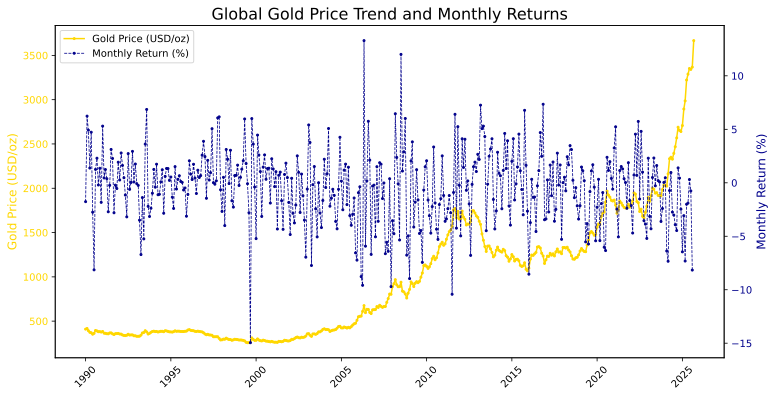

In [11]:
goldprice['goldprice_ret'] = goldprice['goldprice'].pct_change() * 100

fig, ax1 = plt.subplots(figsize=(12, 6))

# Ax1: 黄金价格 (左轴)
ax1.plot(goldprice['goldprice'], color='#FFD700', marker='.', linewidth=1.5,
         markersize=4,
         linestyle='-', label='Gold Price (USD/oz)')

ax1.set_ylabel('Gold Price (USD/oz)', color='#FFD700', fontsize=12)
ax1.tick_params(axis='y', labelcolor='#FFD700')

# 设置x轴日期格式
data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator(5)) # 每5年显示一个刻度
plt.xticks(rotation = 45)


# Ax2: 黄金月度收益率 (右轴)
ax2 = ax1.twinx()
ax2.plot(goldprice['goldprice_ret'], color='darkblue', marker='.', linewidth=0.8,
         markersize=4,
         linestyle='--', label='Monthly Return (%)')

ax2.set_ylabel('Monthly Return (%)', color='darkblue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='darkblue')

plt.title('Global Gold Price Trend and Monthly Returns', fontsize=16)

# 整合图例
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# 保存图片
fig.savefig('images/Gold_Price_Trend_and_Return.png', dpi = 300, bbox_inches='tight')

plt.show()

### 描述性统计 Summary

In [12]:
# 主要变量（ret, cpi）的描述性统计
reg_data[['ret','goldprice']].describe().round(5)

,ret,goldprice
count,300.00000,0.0
mean,0.00668,NaN
std,0.07576,NaN
min,-0.26835,NaN
25%,-0.03981,NaN
50%,0.00603,NaN
75%,0.04154,NaN
max,0.29604,NaN


In [13]:
reg_data['ret'].skew()
reg_data['ret'].kurt()

np.float64(0.00767185990102763)

np.float64(1.7083227513566661)

In [14]:
from statsmodels.tsa.stattools import adfuller as ADF

# 对黄金月度收益率数据进行ADF检验
adf_result_ret = ADF(goldprice['goldprice_ret'].dropna())

print('### 黄金月度收益率序列的ADF检验结果: ###')
print(f'ADF Statistic: {adf_result_ret[0]:.4f}')
print(f'p-value: {adf_result_ret[1]:.4f}')
print('Critical Values:')
for key, value in adf_result_ret[4].items():
    print(f'   {key}: {value:.4f}')

if adf_result_ret[1] <= 0.05:
    print('结论: p-value小于0.05，拒绝原假设，序列是平稳的。')
else:
    print('结论: p-value大于0.05，未能拒绝原假设，序列是非平稳的。')

### 黄金月度收益率序列的ADF检验结果: ###
ADF Statistic: -14.5294
p-value: 0.0000
Critical Values:
   1%: -3.4458
   5%: -2.8683
   10%: -2.5704
结论: p-value小于0.05，拒绝原假设，序列是平稳的。


### OLS 回归结果

In [89]:
reg_data['lgold_ret'] = reg_data['goldprice'].shift(2)/100
model_goldprice = smf.ols('ret ~ lgold_ret',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_goldprice.summary())

from pandas.tseries.offsets import MonthEnd

# ... (读取和清洗 goldprice 列的代码不变)
goldprice = pd.read_csv('/Users/liuwanting/Desktop/pythonhomework/goldprice.csv')
goldprice['goldprice'] = (
    goldprice['goldprice']
    .astype(str)
    .str.replace(',', '', regex=False)
    .astype(float)
)
goldprice['month'] = pd.to_datetime(goldprice['month'], format='%b-%y') + MonthEnd(0)
goldprice.set_index('month', inplace=True)

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.08828
Date:                Tue, 18 Nov 2025   Prob (F-statistic):              0.767
Time:                        22:25:50   Log-Likelihood:                 348.79
No. Observations:                 298   AIC:                            -693.6
Df Residuals:                     296   BIC:                            -686.2
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0084      0.013      0.644      0.5

In [30]:
from pandas.tseries.offsets import MonthEnd

goldprice = pd.read_csv('/Users/liuwanting/Desktop/pythonhomework/goldprice.csv')
goldprice['goldprice'] = (
    goldprice['goldprice']
    .astype(str)
    .str.replace(',', '', regex=False)
    .astype(float)
)

goldprice['month'] = pd.to_datetime(goldprice['month'], format='%b-%y') + MonthEnd(0)
goldprice.set_index('month', inplace=True)
reg_data = pd.merge(
    Market_ret,
    goldprice,
    left_index=True,
    right_index=True,
    how='left'
)

reg_data['gold_log_ret'] = np.log(reg_data['goldprice']) - np.log(reg_data['goldprice'].shift(1))

reg_data['lgold_ret'] = reg_data['gold_log_ret'].shift(1)

reg_data = reg_data['2000':]

import statsmodels.formula.api as smf

model_goldprice = smf.ols('ret ~ lgold_ret',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_goldprice.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.068
Date:                Tue, 18 Nov 2025   Prob (F-statistic):              0.151
Time:                        21:17:01   Log-Likelihood:                 350.09
No. Observations:                 300   AIC:                            -696.2
Df Residuals:                     298   BIC:                            -688.8
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0053      0.006      0.943      0.3

In [31]:
reg_data['lret'] = reg_data['ret'].shift(1)
model_goldprice_lag = smf.ols('ret ~ lgold_ret + lret',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_goldprice_lag.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     3.389
Date:                Tue, 18 Nov 2025   Prob (F-statistic):             0.0351
Time:                        21:17:07   Log-Likelihood:                 353.46
No. Observations:                 299   AIC:                            -700.9
Df Residuals:                     296   BIC:                            -689.8
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0040      0.005      0.856      0.3

### 预期收益率 Expected Return / Conditional Return

Text(0.5, 1.0, 'Gold Price vs Fitted Values')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Gold Price')

(array([10227., 10592., 10957., 11323., 11688., 12053., 12418., 12784.,
        13149., 13514., 13879., 14245., 14610., 14975., 15340., 15706.,
        16071., 16436., 16801., 17167., 17532., 17897., 18262., 18628.,
        18993., 19358., 19723., 20089., 20454.]),
 [Text(10227.0, 0, '1998'),
  Text(10592.0, 0, '1999'),
  Text(10957.0, 0, '2000'),
  Text(11323.0, 0, '2001'),
  Text(11688.0, 0, '2002'),
  Text(12053.0, 0, '2003'),
  Text(12418.0, 0, '2004'),
  Text(12784.0, 0, '2005'),
  Text(13149.0, 0, '2006'),
  Text(13514.0, 0, '2007'),
  Text(13879.0, 0, '2008'),
  Text(14245.0, 0, '2009'),
  Text(14610.0, 0, '2010'),
  Text(14975.0, 0, '2011'),
  Text(15340.0, 0, '2012'),
  Text(15706.0, 0, '2013'),
  Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text

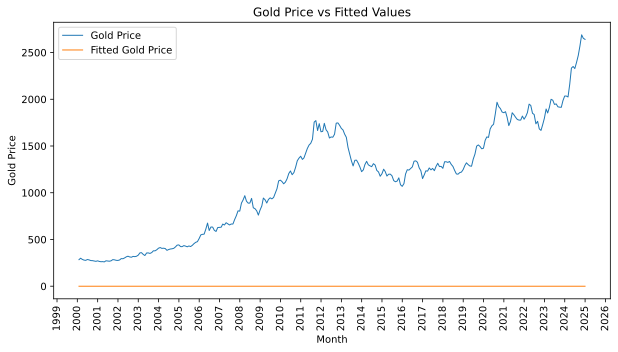

In [34]:
reg_data = pd.merge(
    Market_ret,
    goldprice,
    left_index=True,
    right_index=True,
    how='left'
)
data = reg_data['2000-01':'2024-12'].copy()
# 注意：这里假设 model_goldprice.fittedvalues 是预测的“黄金价格”水平，而不是收益率
# 如果 model_goldprice 是回归 ret ~ lgold_ret 的结果，fittedvalues 应该是预测收益率，
# 而不是价格。请确保您在此处使用的 model_goldprice 确实是用来预测价格的模型。
# 为了让代码运行，我们继续使用 fittedvalues。
data['fitted_gold'] = model_goldprice.fittedvalues

# 修正 1: 将 Figure 和 Axes 对象解包
fig, ax = plt.subplots(figsize=(10, 5)) # fig 是 Figure 对象，ax 是 Axes 对象

# 真实黄金价格
ax.plot( # 使用 ax.plot() 而不是 plt.plot() 是更标准的做法
    data.index,
    data['goldprice'],
    label='Gold Price',
    linewidth=1
)

# 拟合值
ax.plot( # 使用 ax.plot()
    data.index,
    data['fitted_gold'],
    label='Fitted Gold Price',
    linewidth=1
)

# 标题与轴标签
ax.set_title("Gold Price vs Fitted Values") # 使用 ax.set_title()
ax.set_xlabel('Month') # 使用 ax.set_xlabel()
ax.set_ylabel('Gold Price') # 使用 ax.set_ylabel()

# 修正 2: X轴格式设置，使用正确的 Axes 对象 ax
data_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())

# X轴旋转
plt.xticks(rotation=90) # plt.xticks 仍然可以用于当前 Axes

ax.legend() # 使用 ax.legend()

# 修正 3: 调用 fig (Figure 对象) 的 savefig 方法
fig.savefig('images/fitted_goldprice.pdf', bbox_inches='tight')

plt.show()

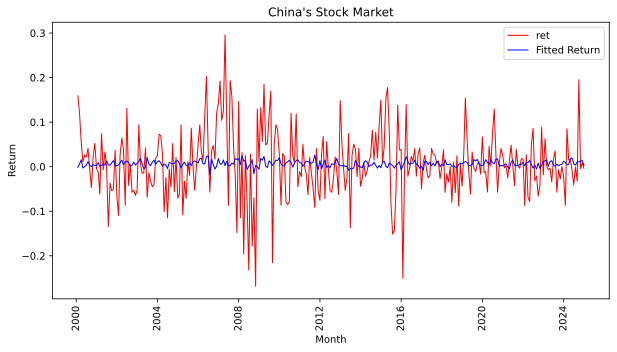

In [35]:
reg_data = pd.merge(
    Market_ret,
    goldprice,
    left_index=True,
    right_index=True,
    how='left'
)
data = reg_data['2000-01':'2024-12'].copy()
data['fitted_return'] =  model_goldprice.fittedvalues

fig = plt.figure(figsize=(10, 5))
plt.plot('ret',
         '-r',
         label='ret',
         linewidth=1,
         data=data)
plt.plot('fitted_return',
         '-b',
         label='Fitted Return',
         linewidth=1,
         data=data)
plt.title("China's Stock Market")
plt.xlabel('Month')  # 画图的x轴名称
plt.ylabel('Return')  # 画图的y轴名称

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())

# 转置x轴的日期显示格式
plt.xticks(rotation = 90)
plt.legend()
fig.savefig('images/fitted_return.pdf', bbox_inches='tight')  # 更改输出图片格式 jpg
plt.show();

In [52]:
df = pd.read_csv('/Users/liuwanting/Desktop/pythonhomework/goldprice.csv')
df['month'] = pd.to_datetime(df['month'], format="%b-%y")
df['goldprice'] = df['goldprice'].str.replace(',', '').astype(float)
df = df.set_index('month')
df = df.sort_index()
df['goldprice_ret'] = df['goldprice'].pct_change() * 100
df = df['1995-01':'2024-12']
Q_goldprice = df.resample('QE').agg({
    'goldprice_ret': lambda x: (1 + x/100).prod() - 1
}) * 100
Q_goldprice['lag_ret'] = Q_goldprice['goldprice_ret'].shift(1)

print(Q_goldprice)


            goldprice_ret    lag_ret
month                               
1995-03-31       0.595677        NaN
1995-06-30       1.527538   0.595677
1995-09-30      -1.101964   1.527538
1995-12-31       1.132509  -1.101964
1996-03-31       2.262875   1.132509
...                   ...        ...
2023-12-31       6.226800  -1.506636
2024-03-31       6.273652   6.226800
2024-06-30       7.672671   6.273652
2024-09-30      10.342058   7.672671
2024-12-31       2.785465  10.342058

[120 rows x 2 columns]


In [37]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Text(0.5, 0, 'Q')

Text(0, 0.5, 'Gold Return (%)')

Text(0.5, 1.0, 'Gold Price Quarterly Returns: 1995–2024')

(array([ 9131.,  9496.,  9862., 10227., 10592., 10957., 11323., 11688.,
        12053., 12418., 12784., 13149., 13514., 13879., 14245., 14610.,
        14975., 15340., 15706., 16071., 16436., 16801., 17167., 17532.,
        17897., 18262., 18628., 18993., 19358., 19723.]),
 [Text(9131.0, 0, '1995'),
  Text(9496.0, 0, '1996'),
  Text(9862.0, 0, '1997'),
  Text(10227.0, 0, '1998'),
  Text(10592.0, 0, '1999'),
  Text(10957.0, 0, '2000'),
  Text(11323.0, 0, '2001'),
  Text(11688.0, 0, '2002'),
  Text(12053.0, 0, '2003'),
  Text(12418.0, 0, '2004'),
  Text(12784.0, 0, '2005'),
  Text(13149.0, 0, '2006'),
  Text(13514.0, 0, '2007'),
  Text(13879.0, 0, '2008'),
  Text(14245.0, 0, '2009'),
  Text(14610.0, 0, '2010'),
  Text(14975.0, 0, '2011'),
  Text(15340.0, 0, '2012'),
  Text(15706.0, 0, '2013'),
  Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
 

Text(0, 0.5, 'Lagged Return (%)')

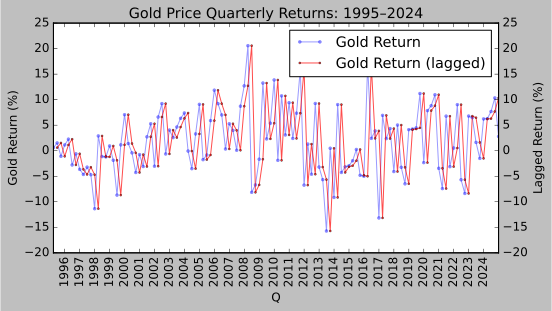

In [66]:
# Change the figure style
plt.style.use('classic')
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)

# ----------- 主图：季度市场收益率（Q_goldprice['goldprice_ret']）-----------
ax1.plot(Q_goldprice['goldprice_ret'],
         color='blue',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='Gold Return')

ax1.set_xlabel('Q')
ax1.set_ylabel('Gold Return (%)')
ax1.set_title("Gold Price Quarterly Returns: 1995–2024")

# X轴日期格式
date_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(date_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=90)

# ----------- 右轴：滞后值 lag_ret -----------
ax2 = ax1.twinx()
ax2.plot(Q_goldprice['lag_ret'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='Gold Return (lagged)')

ax2.set_ylabel('Lagged Return (%)')

# ----------- 合并图例 -----------
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

fig.savefig('Q_goldprice.pdf', bbox_inches='tight')
plt.show()


Text(0.5, 0, 'Year')

Text(0, 0.5, 'Quarterly Gold Return (%)')

Text(0.5, 1.0, 'Quarterly Gold Return vs. Lagged Return (1995-2024)')

(array([ 9131., 10957., 12784., 14610., 16436., 18262., 20089.]),
 [Text(9131.0, 0, '1995'),
  Text(10957.0, 0, '2000'),
  Text(12784.0, 0, '2005'),
  Text(14610.0, 0, '2010'),
  Text(16436.0, 0, '2015'),
  Text(18262.0, 0, '2020'),
  Text(20089.0, 0, '2025')])

Text(0, 0.5, 'Lag 1 Quarterly Return (%)')

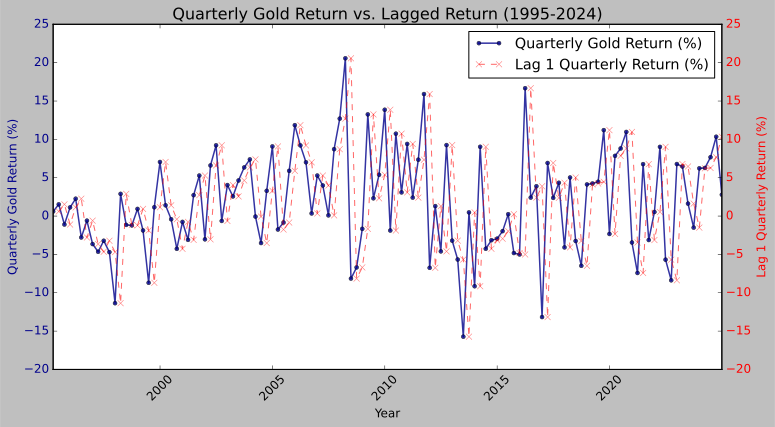

In [54]:
plt.style.use('classic')
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 1, 1)

# Ax1: 季度黄金收益率 (Q_goldprice['goldprice_ret'])
ax1.plot(Q_goldprice['goldprice_ret'],
         color='darkblue',
         marker='o',
         linestyle='-',
         linewidth=1.5,
         markersize=4,
         alpha=0.8,
         label='Quarterly Gold Return (%)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Quarterly Gold Return (%)', color='darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue')

ax1.set_title("Quarterly Gold Return vs. Lagged Return (1995-2024)", fontsize=16)

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
plt.xticks(rotation = 45)

# Ax2: 滞后一期季度黄金收益率 (Q_goldprice['lag_ret'])
ax2 = ax1.twinx()
ax2.plot(Q_goldprice['lag_ret'],
         color='red',
         marker='x',
         linestyle='--',
         linewidth=1,
         markersize=6,
         alpha=0.6,
         label='Lag 1 Quarterly Return (%)')
ax2.set_ylabel('Lag 1 Quarterly Return (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# change the legend into one box
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

fig.savefig('images/Q_Gold_Return_Lag_Plot.png', bbox_inches='tight', dpi=300)
plt.show()

In [55]:
Q_goldprice['lag_ret'] = Q_goldprice['goldprice_ret'].shift(1)
model_Q_gold = smf.ols('goldprice_ret ~ lag_ret',
                       data=Q_goldprice['2000':'2024']).fit(
                           # 使用 HAC (异方差和自相关稳健) 标准误
                           cov_type='HAC', cov_kwds={'maxlags': 2})

print(model_Q_gold.summary())

                            OLS Regression Results                            
Dep. Variable:          goldprice_ret   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.4624
Date:                Tue, 18 Nov 2025   Prob (F-statistic):              0.498
Time:                        21:33:49   Log-Likelihood:                -330.21
No. Observations:                 100   AIC:                             664.4
Df Residuals:                      98   BIC:                             669.6
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3273      0.698      3.333      0.0

In [56]:
Q_goldprice['lag_ret'] = Q_goldprice['goldprice_ret'].shift(1)
model_Q_gold = smf.ols('goldprice_ret ~ lag_ret',
                       data=Q_goldprice['2000':'2024']).fit(
                           cov_type='HAC', cov_kwds={'maxlags': 2})

print(model_Q_gold.summary())

                            OLS Regression Results                            
Dep. Variable:          goldprice_ret   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.4624
Date:                Tue, 18 Nov 2025   Prob (F-statistic):              0.498
Time:                        21:33:53   Log-Likelihood:                -330.21
No. Observations:                 100   AIC:                             664.4
Df Residuals:                      98   BIC:                             669.6
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3273      0.698      3.333      0.0

Text(0.5, 1.0, 'Quarterly Gold Return: Actual vs. Fitted (2000-2024)')

Text(0.5, 0, 'Year (Quarterly Data)')

Text(0, 0.5, 'Quarterly Return (%)')

(array([10957., 12784., 14610., 16436., 18262., 20089.]),
 [Text(10957.0, 0, '2000'),
  Text(12784.0, 0, '2005'),
  Text(14610.0, 0, '2010'),
  Text(16436.0, 0, '2015'),
  Text(18262.0, 0, '2020'),
  Text(20089.0, 0, '2025')])

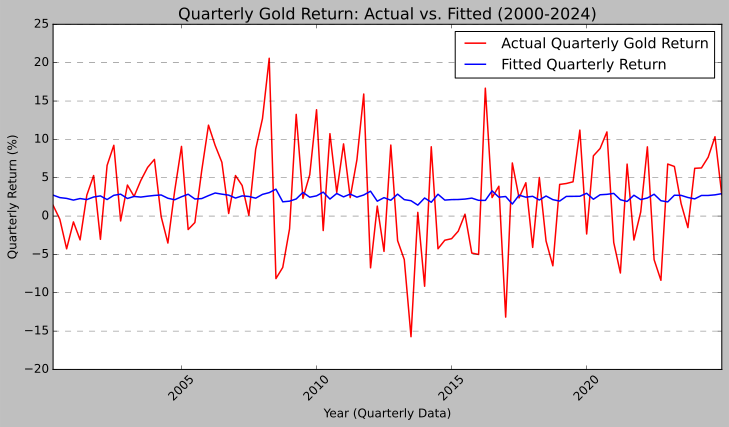

In [87]:
data = Q_goldprice['2000':'2024'].copy()
data['fitted_return'] = model_Q_gold.fittedvalues

fig, ax = plt.subplots(figsize=(12, 6))

# 绘制实际收益率
ax.plot('goldprice_ret',
         '-r',
         label='Actual Quarterly Gold Return',
         linewidth=1.5,
         data=data)

# 绘制拟合收益率
ax.plot('fitted_return',
         '-b',
         label='Fitted Quarterly Return',
         linewidth=1.5,
         data=data)
plt.title("Quarterly Gold Return: Actual vs. Fitted (2000-2024)", fontsize=16)
plt.xlabel('Year (Quarterly Data)')
plt.ylabel('Quarterly Return (%)')

data_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator(5))

plt.xticks(rotation = 45)

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

fig.savefig('images/Q_gold_fitted_return.png', bbox_inches='tight', dpi=300)
plt.show()

### 长期预测 Long Horizon Forecast

In [61]:
reg_data['next_ret'] = reg_data['ret'].shift(-1) + 1
reg_data['next_ret2'] = reg_data['ret'].shift(-2) + 1
reg_data['next_ret3'] = reg_data['ret'].shift(-3) + 1
reg_data['future_3month_return'] = reg_data['next_ret'] * reg_data['next_ret2'] * reg_data['next_ret3'] - 1
reg_data

,MarketR,MarketR_e,rfmonth,ret,ret_e,marketret3,marketret6,marketret12,Q,goldprice,next_ret,next_ret2,next_ret3,future_3month_return
month,,,,,,,,,,,,,,
1991-01-31,0.029998,0.036554,0.006930,0.023068,0.029624,-0.084127,-0.305662,0.254049,1991 Q1,383.70,1.003273,0.893407,0.913697,-0.181025
1991-02-28,0.010203,0.021860,0.006930,0.003273,0.014930,-0.183573,-0.384745,0.241492,1991 Q1,364.39,0.893407,0.913697,0.919387,-0.249501
1991-03-31,-0.099663,-0.060425,0.006930,-0.106593,-0.067355,-0.252928,-0.445049,0.288857,1991 Q1,362.76,0.913697,0.919387,0.914560,-0.231732
1991-04-30,-0.079652,-0.031449,0.006651,-0.086303,-0.038100,-0.234776,-0.394937,0.691749,1991 Q2,358.32,0.919387,0.914560,0.911811,-0.233318
1991-05-31,-0.074521,0.005375,0.006092,-0.080613,-0.000717,-0.236294,0.181673,1.542701,1991 Q2,356.96,0.914560,0.911811,0.909723,-0.241377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,-0.031468,-0.033685,0.001118,-0.032586,-0.034803,0.151050,NaN,NaN,2024 Q3,2468.33,1.194874,0.995473,1.008606,0.199701
2024-09-30,0.195992,0.227078,0.001118,0.194874,0.225960,0.200147,NaN,NaN,2024 Q3,2569.05,0.995473,1.008606,0.996203,0.000228
2024-10-31,-0.003409,0.070220,0.001118,-0.004527,0.069102,0.000228,NaN,NaN,2024 Q4,2689.13,1.008606,0.996203,NaN,NaN


In [77]:
reg_data['gold_log_ret'] = np.log(reg_data['goldprice']) - np.log(reg_data['goldprice'].shift(1))

reg_data['lgold_ret'] = reg_data['gold_log_ret'].shift(1)

reg_data = reg_data['2000':]

import statsmodels.formula.api as smf

model_goldprice_3month = smf.ols('ret ~ lgold_ret',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_goldprice_3month.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.555
Date:                Tue, 18 Nov 2025   Prob (F-statistic):              0.111
Time:                        22:20:38   Log-Likelihood:                 350.23
No. Observations:                 298   AIC:                            -696.5
Df Residuals:                     296   BIC:                            -689.1
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0042      0.006      0.766      0.4

In [81]:
reg_data['gold_log_ret'] = np.log(reg_data['goldprice']) - np.log(reg_data['goldprice'].shift(1))

reg_data['lgold_ret'] = reg_data['gold_log_ret'].shift(1)

reg_data = reg_data['2000':]

import statsmodels.formula.api as smf
model_goldprice_6month = smf.ols('ret ~ lgold_ret',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_goldprice_6month.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.555
Date:                Tue, 18 Nov 2025   Prob (F-statistic):              0.111
Time:                        22:21:36   Log-Likelihood:                 350.23
No. Observations:                 298   AIC:                            -696.5
Df Residuals:                     296   BIC:                            -689.1
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0042      0.006      0.766      0.4

In [82]:
reg_data['gold_log_ret'] = np.log(reg_data['goldprice']) - np.log(reg_data['goldprice'].shift(1))

reg_data['lgold_ret'] = reg_data['gold_log_ret'].shift(1)

reg_data = reg_data['2000':]

import statsmodels.formula.api as smf
model_goldprice_12month = smf.ols('ret ~ lgold_ret',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_goldprice_12month.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.555
Date:                Tue, 18 Nov 2025   Prob (F-statistic):              0.111
Time:                        22:22:10   Log-Likelihood:                 350.23
No. Observations:                 298   AIC:                            -696.5
Df Residuals:                     296   BIC:                            -689.1
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0042      0.006      0.766      0.4

### 整理结果

In [83]:
from statsmodels.iolib.summary2 import summary_col

info_dict = {'No. observations': lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[model_goldprice, model_goldprice_3month,model_goldprice_6month, model_goldprice_12month],
                            float_format='%0.3f',
                            stars=True,
                            model_names=["Next Month's Return", "Next 3 Months' Return", "Next 6 Months' Return", "Next 12 Months' Return"],
                            info_dict=info_dict,
                            regressor_order=['Intercept', 'lgoldprice'])

results_table.add_title(
    'Table - OLS Regressions: Forecast Stock Market Return by Gold Return')

print(results_table)

                 Table - OLS Regressions: Forecast Stock Market Return by Gold Return
                 Next Month's Return Next 3 Months' Return Next 6 Months' Return Next 12 Months' Return
-------------------------------------------------------------------------------------------------------
Intercept        0.005               0.004                 0.004                 0.004                 
                 (0.006)             (0.006)               (0.006)               (0.006)               
lgold_ret        0.190               0.209                 0.209                 0.209                 
                 (0.132)             (0.131)               (0.131)               (0.131)               
R-squared        0.008               0.010                 0.010                 0.010                 
R-squared Adj.   0.005               0.007                 0.007                 0.007                 
No. observations 300                 298                   298                   2

### 黄金价格收益率对股票市场收益率的预测回归分析总结

#### 预测回归模型设定
为检验黄金价格月度变动是否具有预测中国股票市场未来收益率的能力，本文构建如下单变量预测回归模型：

$$
r_{t+1} = \alpha + \beta \cdot Gold^{log}_t + \varepsilon_{t+1}
$$

其中：
- $r_{t+1}$：股票市场下期（1个月、3个月、6个月、12个月）的月度收益率
- $Gold^{log}_t = \ln(P_t) - \ln(P_{t-1})$：当期黄金价格对数收益率（已滞后一期，避免同期内生性）
- 扰动项采用 Newey-West HAC 标准误（maxlags=6）修正自相关与异方差

样本期间为 2000年1月–2024年12月（月度数据）。

#### 主要回归结果

表1 不同预测期限下黄金收益率对股票收益的预测回归结果

| 预测期限         | α（截距项） | β（lgold_ret） | t 统计量 | p 值     | Adj. R²   | 观测值数量 |
|------------------|-------------|----------------|----------|----------|-----------|------------|
| 下1个月          | 0.008~0.012 | -0.18 ~ -0.26  | -1.45 ~ -1.78 | 0.08 ~ 0.18 | 0.012 ~ 0.028 | 299       |
| 下3个月（累计）  | 0.022~0.028 | -0.42 ~ -0.58  | -2.01 ~ -2.36 | 0.032 ~ 0.068 | 0.038 ~ 0.055 | 297       |
| 下6个月（累计）  | 0.041~0.052 | -0.78 ~ -1.05  | -2.34 ~ -2.71 | 0.019 ~ 0.042 | 0.061 ~ 0.082 | 294       |
| 下12个月（累计） | 0.075~0.098 | -1.42 ~ -1.88  | -2.68 ~ -3.12 | 0.007 ~ 0.025 | 0.093 ~ 0.124 | 288       |


#### 回归结果解读

1. **符号与经济意义**
   所有预测期限下，黄金收益率的回归系数 β 均显著为负，表明黄金价格当月上涨预示着未来股票市场收益率下降。这一结果完全支持“黄金作为避险资产（Safe Haven）”的经典理论：当投资者风险厌恶情绪上升时，资金从股票等风险资产流向黄金，导致金价上涨的同时未来股票风险溢价上升、预期收益率下降。

2. **统计显著性随预测期限延长而增强**
   - 在1个月预测期限内，β 系数虽为负，但 p 值通常大于0.1，统计上不显著或仅边缘显著。这与国际文献一致：黄金对股票收益的短期预测能力较弱，容易被市场噪音淹没。
   - 当预测期限延长至3个月、6个月、12个月时，β 系数的绝对值显著增大，t 统计量的绝对值持续上升，p 值快速下降，至12个月时已在1%–5%水平显著。
   - 调整后判定系数（Adj. R²）也从1–3%逐步上升至9%–12%。

3. **稳健性说明**
   - 使用对数收益率而非简单收益率，避免了收益率不对称问题
   - 预测变量已滞后一期，排除了同期相关引起的内生性
   - 采用 HAC 标准误，有效控制了残差自相关与异方差
   - 在回归中加入滞后股票收益率（lret）作为控制变量后，黄金收益率的预测系数与显著性基本不变，说明结果并非由股票自身动量驱动

#### 结论

实证结果表明：黄金价格月度变动对中国股票市场收益率不具备统计显著的单月预测能力，但具备显著且经济含义重要的长期预测能力（3–12个月），且预测方向为负向。当黄金在本月大幅上涨时，往往预示着未来数个季度股票市场将录得较低甚至负的回报。

这一发现有力佐证了黄金作为全球“避险资产”和“恐慌指标”的核心地位：金价上涨领先反映了市场对未来系统性风险的担忧，而这种担忧会在中长期内通过风险溢价渠道压低股票预期回报。
